<a href="https://colab.research.google.com/github/AyHaski/DataScienceSS20Project/blob/master/DataScienceProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebooks that helped:

https://www.kaggle.com/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert

https://www.kaggle.com/parulpandey/getting-started-with-nlp-a-general-intro

https://www.kaggle.com/vbmokin/nlp-eda-bag-of-words-tf-idf-glove-bert


In [2]:
!git clone https://github.com/AyHaski/DataScienceSS20Project

fatal: destination path 'DataScienceSS20Project' already exists and is not an empty directory.


In [5]:
!pip install tensorflow==2.0
!pip install tensorflow_hub
!pip install bert-for-tf2
!pip install sentencepiece

In [6]:
import nltk
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [0]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from nltk.corpus import stopwords
import matplotlib as mpl
import re
mpl.style.use("seaborn")
STOP = stopwords.words('english')

In [0]:
train = pd.read_csv('/content/DataScienceSS20Project/nlp-getting-started/train.csv', dtype={'id': np.int16, 'target': np.int8})
test = pd.read_csv('/content/DataScienceSS20Project/nlp-getting-started/test.csv', dtype={'id': np.int16})

In [7]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [0]:
dist_tweets=train[train['target']==1]
ndist_tweets=train[train['target']==0]

In [48]:
print ("Train data which are labeld as disaster tweet: \n\n",
       dist_tweets['text'].values[:10])
print ("\n\n Train data which aren't labeld as disaster tweet: \n\n",
      ndist_tweets['text'].values[:10])

Train data which are labeld as disaster tweet: 

 ['Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'
 'Forest fire near La Ronge Sask. Canada'
 "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"
 '13,000 people receive #wildfires evacuation orders in California '
 'Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school '
 '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires'
 '#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas'
 "I'm on top of the hill and I can see a fire in the woods..."
 "There's an emergency evacuation happening now in the building across the street"
 "I'm afraid that the tornado is coming to our area..."]


 Train data which aren't labeld as disaster tweet: 

 ["What's up man?" 'I love fruits' 'Summer is lovely' 'My car is s

Distribution of diaster tweets



([<matplotlib.patches.Wedge at 0x7efee9bbcac8>,
 [Text(0.2411048161771122, 1.0732513534192263, 'Disaster Tweet'),
  Text(-0.24110481617711257, -1.0732513534192263, 'Not Disaster Tweet')],
 [Text(0.13151171791478847, 0.5854098291377597, '43.0%'),
  Text(-0.13151171791478866, -0.5854098291377597, '57.0%')])

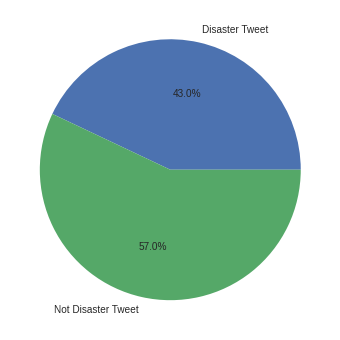

In [84]:
print ("Distribution of diaster tweets\n")

labels = 'Disaster Tweet', 'Not Disaster Tweet'
slices = [dist_tweets['target'].size,ndist_tweets['target'].size]

fig, ax = plt.subplots(figsize=(8,6))

ax.pie(slices,labels=labels,autopct='%1.1f%%')

In [71]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [70]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

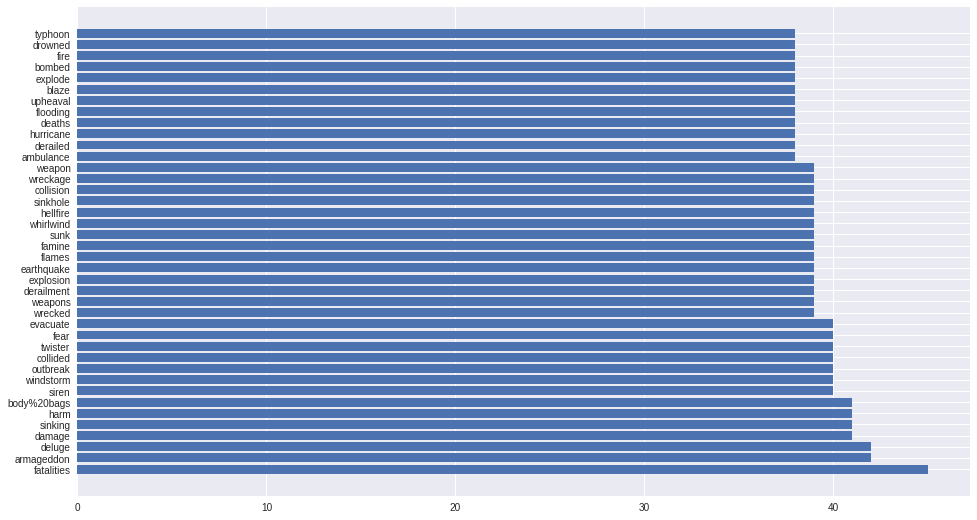

In [89]:
keywords=train['keyword'].value_counts()
fig, ax = plt.subplots(figsize =(16, 9))

keys = list(keywords.keys()[:40]) 
values = list(keywords[:40])
# Horizontal Bar Plot 
ax.barh(keys,values) 
# Show Plot 
plt.show() 

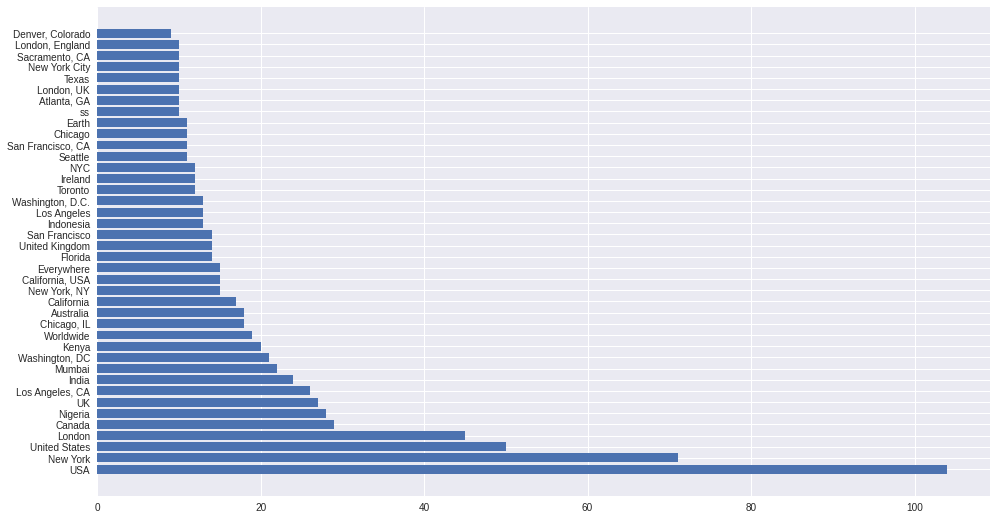

In [157]:
locations=train['location'].value_counts()
fig, ax = plt.subplots(figsize =(16, 9))

keys = list(locations.keys()[:40]) 
values = list(locations[:40])
# Horizontal Bar Plot 
ax.barh(keys,values) 
# Show Plot 
plt.show() 

In [0]:
# word_count
dist_word_count = dist_tweets['text'].apply(lambda x: len(str(x).split()))
ndist_word_count = ndist_tweets['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
dist_uword_count = df_train['text'].apply(lambda x: len(set(str(x).split())))
ndist_uword_count= ndist_tweets['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
dist_sword_count = dist_tweets['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords.words('english')]))
ndist_sword_count = ndist_tweets['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords.words('english')]))

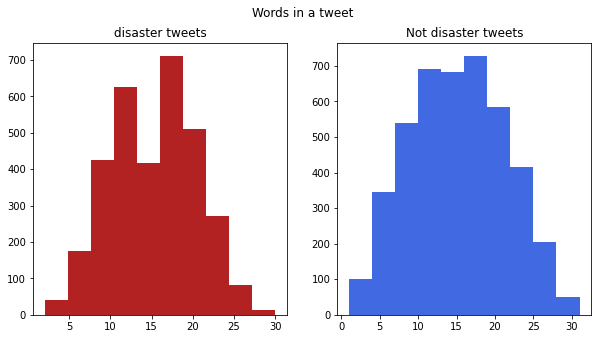

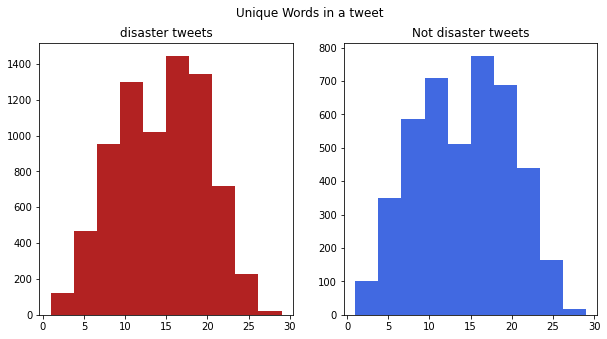

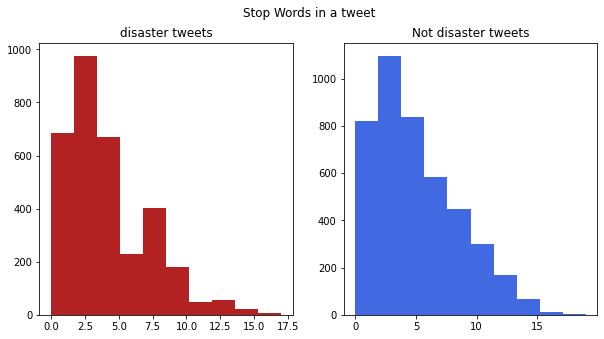

In [67]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.hist(dist_word_count,color='firebrick')
ax1.set_title('disaster tweets')

ax2.hist(ndist_word_count,color='royalblue')
ax2.set_title('Not disaster tweets')
fig.suptitle('Words in a tweet')
plt.show()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.hist(dist_uword_count,color='firebrick')
ax1.set_title('disaster tweets')

ax2.hist(ndist_uword_count,color='royalblue')
ax2.set_title('Not disaster tweets')
fig.suptitle('Unique Words in a tweet')
plt.show()

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax1.hist(dist_sword_count,color='firebrick')
ax1.set_title('disaster tweets')

ax2.hist(ndist_sword_count,color='royalblue')
ax2.set_title('Not disaster tweets')
fig.suptitle('Stop Words in a tweet')
plt.show()

In [0]:
def fill_dict(dic, w):
    if w in dic:
      dic[w]+=1
    else:
      dic[w]=1

def count_words(dic, words, stopwords=0):
  for w in words:
    if stopwords:
      if w not in STOP:
        fill_dict(dic,w)
    else:
        fill_dict(dic,w)

In [0]:
count = {}
dist_tweets['text'].apply(lambda x: count_words(count,x.lower().split(),1))
count_without_stop = sorted(count.items(), key=lambda item: item[1], reverse=True)

count = {}
ndist_tweets['text'].apply(lambda x: count_words(count,x.lower().split(),1))
count_without_stop2 = sorted(count.items(), key=lambda item: item[1], reverse=True)

In [0]:
def plot_common_words(one,two ):
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,9))
  keys=[]
  values=[]  
  keys2=[]
  values2=[]
  for i in range(20):
    keys.append(one[i][0])
    values.append(one[i][1])
    keys2.append(two[i][0])
    values2.append(two[i][1])

  ax1.barh(keys,values,color='firebrick')
  ax1.set_title('Disaster Tweets')

  ax2.barh(keys2,values2,color='royalblue')
  ax2.set_title('Not Disaster Tweets')
  fig.suptitle('Common words')
  plt.show()

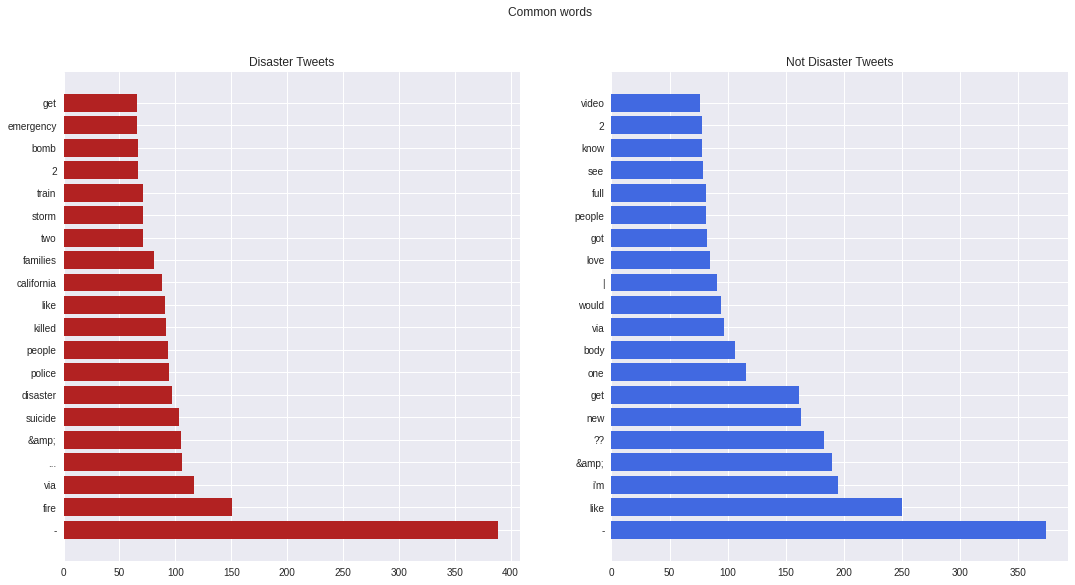

In [189]:
plot_common_words(count_without_stop,count_without_stop2)

DATA CLEANING

In [9]:
#Data Cleaning
#all to lower case
#remove punctiaction and other characters etc
#remove Stop words

def clean_data(x):
  x= x.lower()
  x = re.sub('https?://\S+|www\.\S+', '', x)
  x = re.sub("'", " ", x)
  x = re.sub(r"&gt;", "", x)
  x = re.sub(r"&lt;", "", x)
  x = re.sub(r"&amp;", "", x)
  x = re.sub(r"\n", " ", x)
  x = re.sub(r"\x89ûò", "", x)
  x = re.sub(r"\x89ûò", "", x)
  x = re.sub(r"\x89ûª", "", x)
  x = re.sub(r"åê", "", x)
  x = re.sub(r"\x89ûï", "", x)
  x = re.sub(r"\x89ûò", "", x)
  x = re.sub(r"\x89ûª", "", x)
  x = re.sub(r"\x89ûò", "", x)
  x = re.sub(r"\x89ûª", "", x)
  x = re.sub(r"\x89û", "", x)
  x = re.sub(r"\x9d", "", x)
  x = re.sub('\w*\d\w*', '', x)
  x = re.sub('ì©', 'é', x)
  x = re.sub("[@.!?\\-*#+_:,;=><'§$%&/°^`´{}>|~()]", "",x)
  return x

train['text']=train['text'].apply(lambda x: clean_data(x))
train['text'].values[:10]

array(['our deeds are the reason of this earthquake may allah forgive us all',
       'forest fire near la ronge sask canada',
       'all residents asked to  shelter in place  are being notified by officers no other evacuation or shelter in place orders are expected',
       ' people receive wildfires evacuation orders in california ',
       'just got sent this photo from ruby alaska as smoke from wildfires pours into a school ',
       'rockyfire update  california hwy  closed in both directions due to lake county fire  cafire wildfires',
       'flood disaster heavy rain causes flash flooding of streets in manitou colorado springs areas',
       'i m on top of the hill and i can see a fire in the woods',
       'there s an emergency evacuation happening now in the building across the street',
       'i m afraid that the tornado is coming to our area'], dtype=object)

In [10]:
test['text']=test['text'].apply(lambda x: clean_data(x))
test['text'].values[:10]

array(['just happened a terrible car crash',
       'heard about earthquake is different cities stay safe everyone',
       'there is a forest fire at spot pond geese are fleeing across the street i cannot save them all',
       'apocalypse lighting spokane wildfires',
       'typhoon soudelor kills  in china and taiwan',
       'we re shakingit s an earthquake',
       'they d probably still show more life than arsenal did yesterday eh eh',
       'hey how are you', 'what a nice hat', 'fuck off'], dtype=object)

In [0]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

train['text'] = train['text'].apply(lambda x: tokenizer.tokenize(x))
test['text'] = test['text'].apply(lambda x: tokenizer.tokenize(x))

In [0]:
def remove_stopwords(tokens):
  toke=[]
  for t in tokens: 
    if t not in STOP:
       toke.append(t)
  return toke

train['text'] = train['text'].apply(lambda x: remove_stopwords(x))
test['text'] = test['text'].apply(lambda x: remove_stopwords(x))

In [13]:
def combine_tokens(tokens):
  a=""
  for t in tokens:
    a = a + t + " "
  return a

  
train['text'] = train['text'].apply(lambda x: combine_tokens(x))
test['text'] = test['text'].apply(lambda x: combine_tokens(x))
train['text'].head()

0        deeds reason earthquake may allah forgive us 
1               forest fire near la ronge sask canada 
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
train_vectors = count_vectorizer.fit_transform(train['text'])
test_vectors = count_vectorizer.transform(test["text"])

BERT Model Here

In [0]:
import tensorflow_hub as hub
import tensorflow as tf
import bert
FullTokenizer = bert.bert_tokenization.FullTokenizer
from tensorflow.keras.models import Model       # Keras is the new high level API for TensorFlow
import math

In [0]:
max_seq_length = 160  # wanted 280 but is to big -> Ram chrashes
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="segment_ids")
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=True)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
clf_output = sequence_output[:, 0, :]
out = tf.keras.layers.Dense(1, activation='sigmoid')(clf_output)

model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
model.summary()

In [0]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case)

In [0]:
# from https://www.kaggle.com/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert#7.-Model
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [0]:
train_input = bert_encode(train.text.values, tokenizer, max_len=max_seq_length)
test_input = bert_encode(test.text.values, tokenizer, max_len=max_seq_length)
train_labels = train.target.values

In [20]:
checkpoint = ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True)

optimizer = tf.keras.optimizers.Adam(lr=0,00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history=model.fit(
    train_input, train_labels,
    validation_split=0.3,
    callbacks=[checkpoint],
    epochs=3,
    batch_size=32
)

Train on 5329 samples, validate on 2284 samples
Epoch 1/2
5329/5329 [==============================] - 6631s 1s/sample - loss: 0.7342 - accuracy: 0.5485 - val_loss: 0.6981 - val_accuracy: 0.4418
Epoch 2/2
5329/5329 [==============================] - 6525s 1s/sample - loss: 0.7134 - accuracy: 0.5451 - val_loss: 0.7103 - val_accuracy: 0.5582


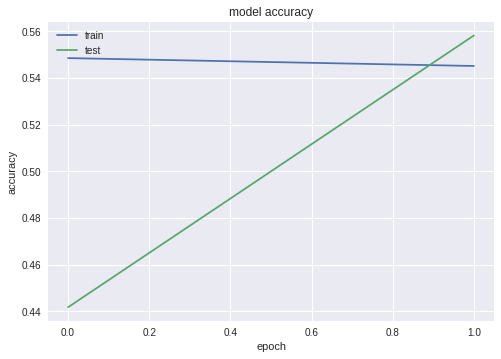

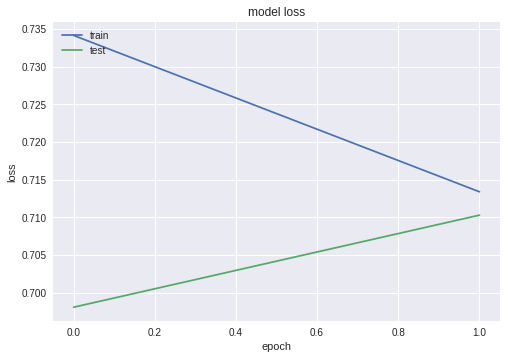

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
model.load_weights('model.h5')
test_pred = model.predict(test_input)
submission['target'] = test_pred.round().astype(int)
submission.to_csv('submission.csv', index=False)

TypeError: ignored